# CS530 Homework 6 Part1

In [2]:
import numpy as np
import pandas as pd

#### Question 1. (4 points)

a. Files 'train.csv' and 'test.csv' contain data for the Heart Disease dataset. Use the scikit-learn package to train a logistic regression model on the training set, train.csv, and predict on the test set, test.csv. The variable that you are predicting is named 'target'. Give an accuracy of your prediction on the test set. You can find the description of the data in 'heart-disease.names' file.


In [13]:
# Your code goes here.
train = pd.read_csv('/Users/gracegupta/Downloads/HW6_part1/data/train.csv')

In [14]:
train = train.drop(['Unnamed: 0'], axis=1)
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
1,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
2,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
3,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1
4,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [15]:
train.shape

(228, 14)

In [22]:
from sklearn.linear_model import LogisticRegression
X = train.loc[:,'age':'thal']
y = train['target']
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)

In [27]:
test = pd.read_csv('/Users/gracegupta/Downloads/HW6_part1/data/test.csv')
test = test.drop(['Unnamed: 0'], axis=1)
test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
1,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0
2,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
3,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
4,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [30]:
X_test = test.loc[:,'age':'thal']
pred = clf.predict(X_test)
pred.shape

(76,)

In [31]:
y_test = test['target']
y_test.shape

(76,)

In [32]:
clf.score(X_test, y_test) #Mean accuracy

0.868421052631579

b. Use the scikit-learn package to plot an ROC curve of the predictions on the test set from 1a.

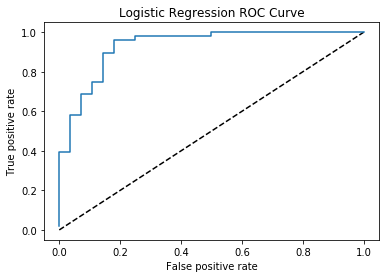

In [34]:
# Your code goes here.
%matplotlib inline
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

c. Implement a function to plot the ROC curve of the model you get from on the test set. (Hints: 1. check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) of logistic regression to get the probability output. 2. Loop through a list of probability thresholds for classification and calculate the Specificity and Sensitivity for each threshold value.)

In [44]:
predict_probabilities = clf.predict_proba(X_test)[:,1]
thresholds = np.linspace(0,1,11)
pos = np.sum(y_test)
neg = len(y_test)-pos

In [52]:
def roc_curve(predict_probabilities, thresholds): 
    fpr = [] #false positive rate
    tpr = [] #true positive rate
    
    for t in thresholds:
        FP = 0
        TP = 0
        for i in range(len(predict_probabilities)):
            if(float(predict_probabilities[i]) > t):
                if y_test[i] == 1:
                    TP = TP + 1
                else:
                    FP = FP + 1
        tpr.append(TP/float(pos))
        fpr.append(FP/float(neg))
        
    plt.scatter(fpr, tpr)
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Logistic Regression ROC Curve')
    plt.show()
    pass

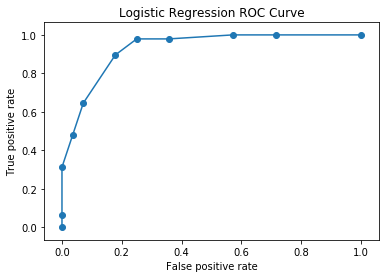

In [53]:
roc_curve(predict_probabilities, thresholds)

#### Question 2 (3 points)

a. Use the same dataset in Question 1 to train a classification model with the LDA algorithm. Give a prediction accuracy on the test set.

In [56]:
import sklearn
sklearn.__version__

'0.19.1'

In [60]:
# Your code goes here
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [62]:
predict = clf_lda.predict(X_test)
clf_lda.score(X_test, y_test)

0.8552631578947368

b. Plot the ROC curve of the LDA model you trained in 2a on the test set. You can use the scikit-learn package.

In [78]:
print(len(y_pred_prob))
print(len(y_test))

76
76


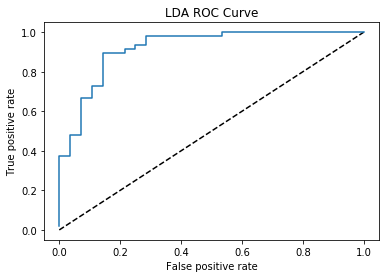

In [83]:
%matplotlib inline
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_prob = clf_lda.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='LDA')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LDA ROC Curve')
plt.show()

c. Compare the ROC and accuracy on the test set that you get from Questions 1 and 2. Which algorithm performs better on this dataset? Explain your answer and hypothesize why one algorithm might be better than the other on this dataset.

# Your code goes here
The logistic regression algorithm performed better on the dataset because the accuracy score was slightly higher. 
It could be that some of the assumptions of LDA, such as Gaussian likelihoods, was not accurate for this dataset.